In [1]:
!python --version

Python 3.10.8


In [1]:
import numpy as np

In [2]:
# def numerical_gradient(f,X):
#     h = 0.0000001
#     X = np.array(X)
#     grad = np.zeros_like(X,dtype='float64')
#     for i in range(X.size):
#         grad[i] = (f(X[i]+h) - f(X[i]))/h
        
#     return np.round(grad,3)
def numerical_gradient(f, X):
    h = 1e-10  # 작은 값
    X = np.array(X)
    grad = np.zeros_like(X, dtype='float64')
    
    for i in range(X.size):
        # X의 i번째 요소를 살짝 변경하여 함수 값을 계산
        temp_val = X[i]  # 원래 값 저장
        X[i] = temp_val + h  # X[i]를 h만큼 증가
        f_x_plus_h = f(X)  # 증가시킨 함수 값
        X[i] = temp_val - h  # X[i]를 h만큼 감소
        f_x_minus_h = f(X)  # 감소시킨 함수 값
        grad[i] = (f_x_plus_h - f_x_minus_h) / (2 * h)  # 중앙 차분 방식
        X[i] = temp_val  # 원래 값으로 복원
    
    return np.round(grad, 3)

In [3]:
def function_2(X):
    X = np.asarray(X)
    return X[0]**2 + X[1]**2

In [4]:
numerical_gradient(function_2, [3.0,4.0])

array([6., 8.])

In [5]:
numerical_gradient(function_2, [0.0,2.0])

array([0., 4.])

In [6]:
numerical_gradient(function_2, [0.0,1.0])

array([0., 2.])

In [7]:
def gradient_descent(f, init_x, lr = 0.01, steps = 100):
    x= init_x
    x_history = []
    
    for i in range(steps):
        x_history.append(x.copy())
        grad = numerical_gradient(f,x)
        if i%10 == 0 :
            print(f'grad : {grad}')
        x -= lr * grad
        
    return x, np.array(x_history)

- x.copy()는 배열 x에 대하여 메모리주소가 아니라, 완전한 복사본을 생성하여 현재의 값을 새로운 메모리 위치에 저장하는 깊은 복사를 수행한다

In [8]:
init_x = [-30.0,40.0]
lr=1
steps = 100
x, x_history = gradient_descent(function_2, init_x, lr, steps)
x

grad : [-59.999  79.999]
grad : [-59.968  80.033]
grad : [-59.958  80.065]
grad : [-59.943  80.076]
grad : [-59.943  80.076]
grad : [-59.943  80.076]
grad : [-59.943  80.076]
grad : [-59.943  80.076]
grad : [-59.943  80.076]
grad : [-59.943  80.076]


array([-29.971,  40.038])

정답인 0에 근사한 값이 되었다. 
- 정확히 (0, 0)이 되지 않은 이유는 여기서는 수치미분을 사용했기 때문이다. 수치미분은 오차를 포함한다.
- 오차를 없애려면 h의 값을 정말 아주 작은 값으로 만들면 된다.
    - 그러나 이 방법은 파이썬 연산 능력의 한계로 계산할 수 없다

### np.iter

In [9]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])
it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) 
# 다차원 배열의 인덱스를 튜플로 받는다
# 읽기와 쓰기 가능

while not it.finished:
    print(it.multi_index, x[it.multi_index])
    it.iternext()

(0, 0) 1
(0, 1) 2
(0, 2) 3
(1, 0) 4
(1, 1) 5
(1, 2) 6


### 신경망에서의 기울기

In [10]:
import numpy as np
def softmax(a):
    a = np.array(a, dtype=np.float64)  # 명시적으로 float64 타입으로 변환
    c = np.max(a)
    exp_a = np.exp(a - c)  # 최대값을 빼서 오버플로우 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def cross_entropy_error(y,t):
    y = np.array(y)
    if y.ndim == 1 : # 데이터가 하나 들어올 경우 2차원으로 변경
        t = np.array(t)
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

def numerical_gradient(f, X):
    h = 1e-10  # 작은 값
    X = np.array(X)
    grad = np.zeros_like(X, dtype='float64')
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        i = it.multi_index
        temp_val = x[i]
        x[i] = float(temp_val) + h
        fxh1 = f(x)
        
        x[i] = temp_val
        fxh2 = f(x)
        
        grad[i] = (fxh1-fxh2)/h
        
        it.iternext()
        
    return np.round(grad, 3)

In [11]:
class simpleNet :
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self,x,t):
        x = np.array(x)
        t = np.array(t)
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [12]:
net = simpleNet()
print(net.W)

[[-0.69566119 -0.03139984  0.05837273]
 [ 0.78676969 -0.15041037  1.0657872 ]]


In [13]:
x = [0.6,0.9]
p = net.predict(x)
p

array([ 0.29069601, -0.15420924,  0.99423211])

In [14]:
np.argmax(p)

2

In [15]:
t = [0,1,0]
net.loss(x,t)

1.7428522020057404

In [16]:
t = [1,0,0]
net.loss(x,t)

1.297946949790832

- 손실값을 계산하는 f(W) 정의
- 이 함수와 초기화된 가중치를 미분 함수에 넣어 변화량(기울기)을 계산

In [17]:
x = np.array([0.6,0.9])
t = np.array([0,1,0])

In [18]:
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f,net.W)
print(dW)

[[-0.132 -0.132 -0.132]
 [ 0.927  0.927  0.927]]


### Optimizer

In [34]:
# import numpy as np
import matplotlib.pyplot as plt
def loss_function(w):
    return w**2
def numerical_diff(f,w):
    dw = 0.0001
    return (f(w+dw)-f(w))/dw

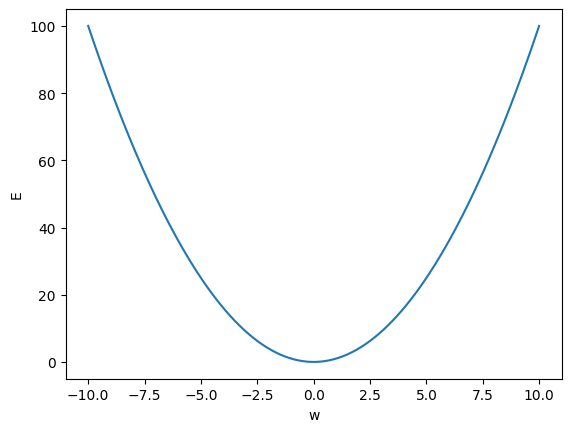

In [35]:
w = np.arange(-10.0,10.1,0.1)
y = loss_function(w)

plt.xlabel('w')
# plt.xlim(-10,10)
plt.ylabel('E')
plt.plot(w,y)
plt.show()

In [40]:
w_50 = numerical_diff(loss_function,5.0)
w_05 = numerical_diff(loss_function,0.5)
print(f'w_50 : {w_50:.3f}, w_05 : {w_05:.3f}')

w_50 : 10.000, w_05 : 1.000


In [41]:
w_m50 = numerical_diff(loss_function,-5.0)
w_m05 = numerical_diff(loss_function,-0.5)
print(f'w_m50 : {w_m50:.3f}, w_m05 : {w_m05:.3f}')

w_m50 : -10.000, w_m05 : -1.000
